# Nomor 1

In [1]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import pandas as pd

4423680/4422102 [==============================] - 0s 0us/step
Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


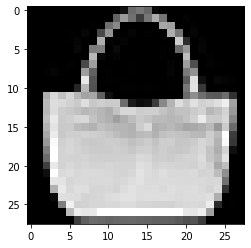

In [2]:
(feature_train, label_train), (feature_test, label_test) = fashion_mnist.load_data()

print("Train", feature_train.shape, label_train.shape)
print("Test", feature_test.shape, label_test.shape)

plt.imshow(feature_train[100], cmap=plt.get_cmap('gray'))

## Feature Engineering

In [3]:
feature_train = feature_train.reshape((feature_train.shape[0], 28, 28, 1))
feature_test = feature_test.reshape((feature_test.shape[0], 28, 28, 1))

In [4]:
print(feature_train.shape)

(60000, 28, 28, 1)


In [5]:
from tensorflow.keras.utils import to_categorical

label_train = to_categorical(label_train)
label_test = to_categorical(label_test)

print(label_train)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
feature_train = feature_train.astype('float32')
feature_test = feature_test.astype('float32')

feature_train = feature_train / 255.0
feature_test = feature_test / 255.0

In [7]:
feature_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization

## Multilayer Perceptron

In [9]:
base_model = Sequential()

base_model.add(Flatten(input_shape=(28, 28, 1)))
base_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform')) # Activation relu dipakai, ini salah satu function yang paling banyak dipakai
base_model.add(Dense(10, activation='softmax')) # Activation softmax dipakai untuk classification, nilai 10 karena terdapat 10 class (0-9)

opt = SGD(lr=0.01, momentum=0.9) # Optimizer (Stochastic Gradient Descent), untuk mencari minima dari grafik fungsi loss

base_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # Loss Function

base_model.summary()

history = base_model.fit(feature_train, label_train, batch_size=32, validation_data=(feature_test, label_test), epochs=10)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5283 - accuracy: 0.8135 - val_loss: 0.4545 - val_accuracy: 0.8370
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3952 - accuracy: 0.8573 - val_loss: 0.4007 - val_accuracy: 0.8572
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3572 - accurac

In [10]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [11]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.528313,0.813467,0.454473,0.8370,0
1,0.395248,0.857267,0.400690,0.8572,1
2,0.357164,0.870967,0.412769,0.8465,2
3,0.339497,0.876417,0.358108,0.8716,3
4,0.320334,0.883517,0.368456,0.8683,4
5,0.305174,0.888483,0.353666,0.8696,5
6,0.295124,0.891050,0.356777,0.8695,6
7,0.284814,0.895233,0.341016,0.8761,7
8,0.274565,0.898883,0.347816,0.8717,8
9,0.266539,0.902267,0.352837,0.8757,9


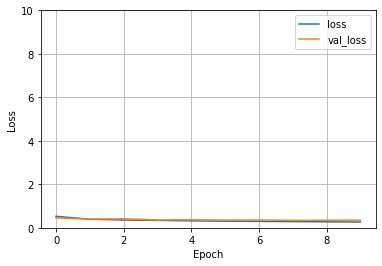

In [12]:
plot_loss(history) # epoch vs loss graph

In [13]:
loss, accuracy = base_model.evaluate(feature_test,  label_test, verbose=2)

print("Test accuracy:", accuracy)
print("Test loss:", loss)

313/313 - 0s - loss: 0.3528 - accuracy: 0.8757
Test accuracy: 0.8756999969482422
Test loss: 0.3528367877006531


## CNN (Convolutional Neural Network)

In [14]:
# Adapted from: https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))) # Convolution, 32 filters, masing-masing dengan kernel 3x3

model.add(MaxPooling2D((2, 2))) # Pooling

model.add(Flatten()) # Flatten hasil output

# Fully connected layer
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform')) # Activation relu dipakai, ini salah satu function yang paling banyak dipakai
model.add(Dense(10, activation='softmax')) # Activation softmax dipakai untuk classification, nilai 10 karena terdapat 10 class (0-9)

opt = SGD(lr=0.01, momentum=0.9) # Optimizer (Stochastic Gradient Descent), untuk mencari minima dari grafik fungsi loss

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # Loss Function

model.summary()

history_cnn = model.fit(feature_train, label_train, batch_size=32, validation_data=(feature_test, label_test), epochs=10)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.4435 - accuracy: 0.8395 - val_loss

In [15]:
loss, accuracy = model.evaluate(feature_test,  label_test, verbose=2)

print("Test accuracy:", accuracy)
print("Test loss:", loss)

313/313 - 2s - loss: 0.2787 - accuracy: 0.9131
Test accuracy: 0.913100004196167
Test loss: 0.2787023186683655


In [16]:
history_dataframecnn = pd.DataFrame(history_cnn.history)
history_dataframecnn['epoch'] = history_cnn.epoch
history_dataframecnn

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.443523,0.839483,0.351985,0.8738,0
1,0.290513,0.894567,0.296092,0.8942,1
2,0.246813,0.909400,0.289590,0.8956,2
3,0.219697,0.919517,0.267011,0.9032,3
4,0.197038,0.927867,0.274930,0.9026,4
5,0.177337,0.933867,0.277691,0.9045,5
6,0.161337,0.939333,0.290774,0.9003,6
7,0.146081,0.945650,0.279165,0.9069,7
8,0.131823,0.953050,0.284240,0.9058,8
9,0.118558,0.956517,0.278702,0.9131,9


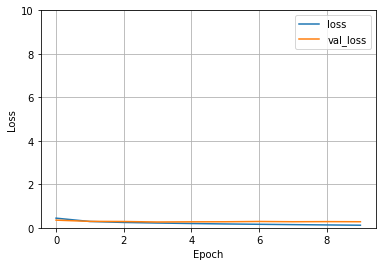

In [17]:
plot_loss(history_cnn)

## Kesimpulan
Dari kedua arsitektur di atas, dapat kita ketahui bahwa arsitektur terbaik adalah Convolutional Neural Network(CNN). Akurasi yang diperoleh lebih tinggi (mencapai 0.91) dan validation loss yang diperoleh juga lebih rendah (<0.3) dibandingkan dengan arsitektur Multilayer Perceptron (MP).

# Nomor 2

## Fashion MNIST

In [36]:
'''
Deeper CNN
'''
deeper_model = Sequential()

# Convolution layer yang lebih dalam
deeper_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
deeper_model.add(MaxPooling2D((2, 2)))
deeper_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
deeper_model.add(MaxPooling2D((2, 2)))

deeper_model.add(Flatten())

deeper_model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
deeper_model.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.01, momentum=0.9)

deeper_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

deeper_model.summary()

deeper_model.fit(feature_train, label_train, batch_size=32, validation_data=(feature_test, label_test), epochs=10)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               160100    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

## MNIST

In [37]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd

11493376/11490434 [==============================] - 0s 0us/step
Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


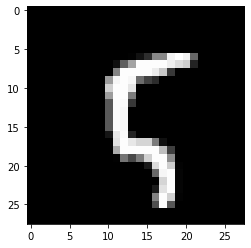

In [40]:
(feature_train, label_train), (feature_test, label_test) = mnist.load_data()

print("Train", feature_train.shape, label_train.shape)
print("Test", feature_test.shape, label_test.shape)

plt.imshow(feature_train[100], cmap=plt.get_cmap('gray'))

### Feature Engineering

In [41]:
feature_train = feature_train.reshape((feature_train.shape[0], 28, 28, 1))
feature_test = feature_test.reshape((feature_test.shape[0], 28, 28, 1))

In [42]:
print(feature_train.shape)

(60000, 28, 28, 1)


In [43]:
label_train = to_categorical(label_train)
label_test = to_categorical(label_test)

In [44]:
feature_train = feature_train.astype('float32')
feature_test = feature_test.astype('float32')

feature_train = feature_train / 255.0
feature_test = feature_test / 255.0

### Multilayer Perceptron

In [45]:
base_model = Sequential()

base_model.add(Flatten(input_shape=(28, 28, 1)))
base_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform')) # Activation relu dipakai, ini salah satu function yang paling banyak dipakai
base_model.add(Dense(10, activation='softmax')) # Activation softmax dipakai untuk classification, nilai 10 karena terdapat 10 class (0-9)

opt = SGD(lr=0.01, momentum=0.9) # Optimizer (Stochastic Gradient Descent), untuk mencari minima dari grafik fungsi loss

base_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # Loss Function

base_model.summary()

history = base_model.fit(feature_train, label_train, batch_size=32, validation_data=(feature_test, label_test), epochs=10)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3043 - accuracy: 0.9122 - val_loss: 0.1667 - val_accuracy: 0.9508
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1474 - accuracy: 0.9575 - val_loss: 0.1208 - val_accuracy: 0.9636
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1050 - accur

In [46]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [47]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.304280,0.912233,0.166738,0.9508,0
1,0.147420,0.957550,0.120808,0.9636,1
2,0.104972,0.969517,0.094836,0.9712,2
3,0.082671,0.976017,0.088052,0.9748,3
4,0.068473,0.980050,0.084109,0.9747,4
5,0.056959,0.983800,0.076310,0.9772,5
6,0.049476,0.985817,0.074377,0.9768,6
7,0.041793,0.988050,0.069836,0.9786,7
8,0.036066,0.989467,0.071730,0.9785,8
9,0.031606,0.991267,0.069137,0.9782,9


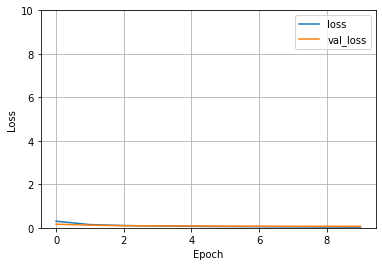

In [48]:
plot_loss(history)

In [49]:
loss, accuracy = base_model.evaluate(feature_test,  label_test, verbose=2)

print("Test accuracy:", accuracy)
print("Test loss:", loss)

313/313 - 1s - loss: 0.0691 - accuracy: 0.9782
Test accuracy: 0.9782000184059143
Test loss: 0.06913711130619049


### CNN

In [50]:
# Adapted from: https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))) # Convolution, 32 filters, masing-masing dengan kernel 3x3

model.add(MaxPooling2D((2, 2))) # Pooling

model.add(Flatten()) # Flatten hasil output

# Fully connected layer
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform')) # Activation relu dipakai, ini salah satu function yang paling banyak dipakai
model.add(Dense(10, activation='softmax')) # Activation softmax dipakai untuk classification, nilai 10 karena terdapat 10 class (0-9)

opt = SGD(lr=0.01, momentum=0.9) # Optimizer (Stochastic Gradient Descent), untuk mencari minima dari grafik fungsi loss

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # Loss Function

model.summary()

history_cnn = model.fit(feature_train, label_train, batch_size=32, validation_data=(feature_test, label_test), epochs=10)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1588 - accuracy: 0.9510 - val_loss

In [51]:
loss, accuracy = model.evaluate(feature_test,  label_test, verbose=2)

print("Test accuracy:", accuracy)
print("Test loss:", loss)

313/313 - 2s - loss: 0.0429 - accuracy: 0.9880
Test accuracy: 0.9879999756813049
Test loss: 0.04285687208175659


In [52]:
history_dataframecnn = pd.DataFrame(history_cnn.history)
history_dataframecnn['epoch'] = history_cnn.epoch
history_dataframecnn

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.158777,0.951033,0.067683,0.9789,0
1,0.055226,0.983650,0.050798,0.9842,1
2,0.035216,0.989233,0.055209,0.9824,2
3,0.025608,0.992400,0.043164,0.9866,3
4,0.017307,0.995350,0.044392,0.9856,4
5,0.012979,0.996117,0.040777,0.9866,5
6,0.008810,0.997750,0.040829,0.9872,6
7,0.005819,0.998733,0.039349,0.9883,7
8,0.004230,0.999100,0.046071,0.9870,8
9,0.002393,0.999683,0.042857,0.9880,9


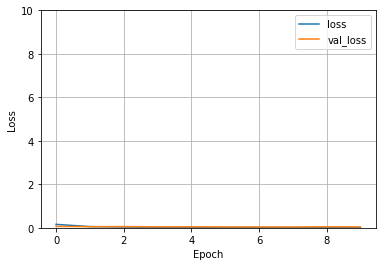

In [53]:
plot_loss(history_cnn)

### Deeper Model

In [54]:
'''
Deeper Model for MNIST
'''
deeper_modelMNIST = Sequential()

# Convolution layer yang lebih dalam
deeper_modelMNIST.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
deeper_modelMNIST.add(MaxPooling2D((2, 2)))
deeper_modelMNIST.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
deeper_modelMNIST.add(MaxPooling2D((2, 2)))

deeper_modelMNIST.add(Flatten())

deeper_modelMNIST.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
deeper_modelMNIST.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.01, momentum=0.9)

deeper_modelMNIST.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

deeper_modelMNIST.summary()

deeper_modelMNIST.fit(feature_train, label_train, batch_size=32, validation_data=(feature_test, label_test), epochs=10)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               160100    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

### Kesimpulan
Hasil dari deeper convolution belum tentu lebih baik dibandingkan dengan CNN. Contohnya pada dataset fashion_mnist, hasil akurasi yang diperoleh dengan menggunakan deeper convolution lebih rendah dibandingkan dengan penggunaan arsitektur CNN. Untuk dataset mnist, hasil deeper convolution lebih bagus jika dibandingkan dengan penggunaan arsitektur Multilayer Perceptron dan CNN. Nilai validation loss yang dihasilkan juga sangat kecil. Perbedaan ini kemungkinan disebabkan oleh kompleksitas dataset yang dimiliki. Kalau diperhaitkan, dataset fashion_mnist memang lebih kompleks dari dataset mnist.